In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("data/titanic3.xls")

In [3]:
cols=['survived','name','pclass' ,'sex', 'age',
       'fare',]
all_df=all_df[cols]

In [4]:
df=all_df.drop(['name'], axis=1)
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
fare_mean = df['fare'].mean()
df['fare'] = df['fare'].fillna(fare_mean)
df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)

In [5]:
msk = numpy.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
print('total:',len(df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [6]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_Features=minmax_scale.fit_transform(train_Features)  
test_Features=minmax_scale.fit_transform(test_Features)

In [7]:
train_Features[355:359]

array([[0.5       , 0.        , 0.32049799, 0.12687155],
       [0.5       , 0.        , 0.64665896, 0.12687155],
       [0.5       , 0.        , 0.74178924, 0.03122992],
       [0.5       , 1.        , 0.32049799, 0.14346245]])

In [8]:
train_Label[:4]

array([1., 1., 0., 0.])

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [10]:
model = Sequential()

In [11]:
model.add(Embedding(input_dim=4,output_dim=1))

In [12]:
model.add(LSTM(2))

In [13]:
model.add(Dense(1, activation = "sigmoid"))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 1)           4         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 2s - loss: 0.6921 - acc: 0.5677 - val_loss: 0.6853 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6898 - acc: 0.5871 - val_loss: 0.6769 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6876 - acc: 0.5871 - val_loss: 0.6694 - val_acc: 0.7885
Epoch 4/30
 - 0s - loss: 0.6857 - acc: 0.5871 - val_loss: 0.6605 - val_acc: 0.7885
Epoch 5/30
 - 0s - loss: 0.6838 - acc: 0.5871 - val_loss: 0.6531 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.6822 - acc: 0.5871 - val_loss: 0.6462 - val_acc: 0.7885
Epoch 7/30
 - 0s - loss: 0.6808 - acc: 0.5871 - val_loss: 0.6372 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.6792 - acc: 0.5871 - val_loss: 0.6308 - val_acc: 0.7885
Epoch 9/30
 - 0s - loss: 0.6776 - acc: 0.5871 - val_loss: 0.6243 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.6755 - acc: 0.5871 - val_loss: 0.6155 - val_acc: 0.7885
Epoch 11/30
 - 0s - loss: 0.6728 - acc: 0.5871 - val_loss: 0.6055 - val_acc: 0.7885
Epoch 12/30
 - 0s - loss: 0.6690 - acc:

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

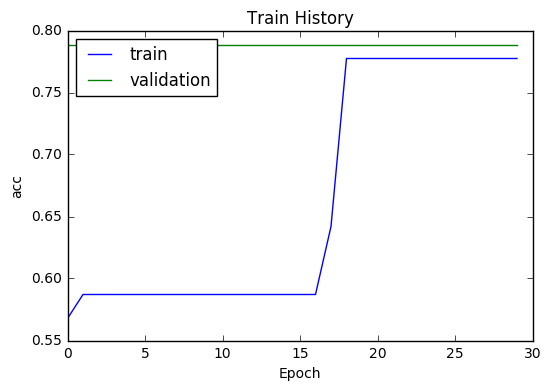

In [18]:
show_train_history(train_history,'acc','val_acc')

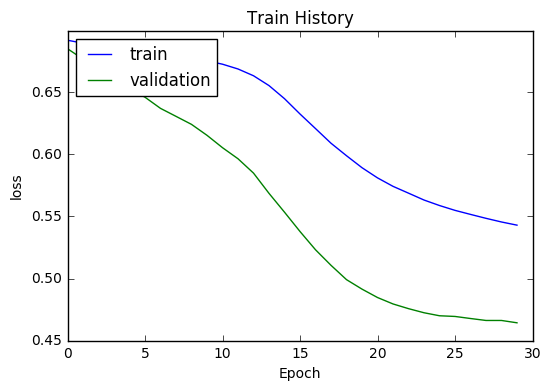

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 89us/step


In [21]:
scores[1]

0.7927272731607611